# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/666.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>

---

# <center>Milestone 3 : Table of content</center>

0. **Imports, initialisations**

1. **Recall of certain methods from Milestone 2**
   - 1.1. Data preprocessing
   - 1.2. Construction of a new funny metric
   - 1.3. Gathering of other datasets
   - 1.4. Tokenisation and lemmatisation of data
   - 1.5. Descriptive statistic tasks
   - 1.6. Building usefull metrics


2. **Narrative Flow**
   - 2.1. **Axis 1 – What Is Considered Funny**
   - 2.2. **Axis 2 – How professions are laughed about**
   - 2.3. **Axis 3 – Gender Roles and stereotypes**

## 0. Imports, initialisations

In case an import cannot be imported run this:

In [1]:
import importlib
import src.utils.paths as p
importlib.reload(p)

<module 'src.utils.paths' from 'c:\\Users\\cyrie\\OneDrive\\Documents\\EPFL\\2025_MA_1\\ADA\\ada-2025-project-adacore42\\src\\utils\\paths.py'>

Getting the project root directory path.

In [ ]:
from pathlib import Path
import sys
import os

try:
    root = Path(__file__).resolve().parent
except NameError:
    root = Path.cwd()  # fallback for Jupyter notebooks

while root.parent != root:
    if any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
        break
    root = root.parent

# Fallback in case nothing found
if not any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb"]):
    print("Could not locate project root — defaulting to current working directory")
    root = Path.cwd()

print(f"Root folder detected at: {root}")

# Ensure importability of the project
if str(root) not in sys.path:
    sys.path.insert(0, str(root))


from src.utils.paths import STORED_DATAPREP_PKL_PATH, STORED_PLOTSGUI_PKL_PATH, DATA_PREPARATION_PY_PATH, STORED_DATAPREPNOUNS_PKL_PATH, STORED_DATAPREPTOKENS_PKL_PATH, OCCUPATIONS_CSV_PATH, TFIDF_MATRIX_NPZ_PATH, TF_IDF_MATRIX_METADATA_NPZ_PATH, TFIDF_MATRIX_JOBLIB_PATH, OCCUPATIONS_ANALYSIS_PKL_PATH, OCCUPATIONS_CATEGORY_ANALYSIS_PKL_PATH
print(DATA_PREPARATION_PY_PATH.resolve()) #If works: ...../ADAcore42/src/data/DataPreparation.py

Root folder detected at: c:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42
C:\Users\cyrie\OneDrive\Documents\EPFL\2025_MA_1\ADA\ada-2025-project-adacore42\src\data\DataPreparation.py


In [ ]:
# To be verified: is all needed?
import pandas as pd
import numpy as np
import pickle
import json
import ast
from collections import Counter
import scipy.stats as stats
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from scipy.sparse import load_npz, save_npz
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go


# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, Markdown

# data processing
#from src.data.tokenise import load_data, apply_preprocessing, save_data
#from src.data.extract_nouns import load_data, apply_noun_extraction, save_noun_data

# utils
from src.utils.general_utils import *
#from src.utils.gui import plots_gui as pg
from src.utils.function_axis_1 import plot_global_vote_distribution
from src.utils.function_axis_1 import compute_funny_ranking
from src.utils.tf_idf_matrix import extract_documents, create_tf_idf_matrix, extract_terms_counts

# scripts
import src.scripts.descriptive_stats_tasks as dst
import src.scripts.axis1 as ax_one
from src.scripts.axis2 import *

# models
from src.models.gender_analysis import GenderAnalysis
from src.models.similarity_analysis import SimilarityModel, CaptionClustering, SimilarHumorAnalysis

%matplotlib inline

c:\Users\cyrie\anaconda3\envs\ada\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Recall of certain methods from Milestone 2

##### See the results from Milestone 2 [here](results_MS2.ipynb)

### 1.1. Data preprocessing
Cleaning and preprocessing of the dataset : [*The main preprocessing is done by this file*](src/data/DataPreparation.py)


### 1.2. Construction of a New Funny Metric
To better identify which captions are truly funny, we designed a new *funny metric* that combines both the **proportion of votes** and the **popularity (number of votes)** of each caption.

*écrire la démarche de la nouvelle metric ?*


### 1.3. Gathering of other datasets
**Temporal dataset augmentation** : The following webpage has dates of some of the contests. We add it to the **dataC** table as a new column:
"https://nextml.github.io/caption-contest-data/"


**Occupations dataset :** Five datasets of varying size and specificity were loaded. In total, these add up to around 33,000 occupations.
 - [**O*NET**](https://www.onetonline.org/find/all)  
 - [**ESCO (ESCO dataset v1.2.0)**](https://esco.ec.europa.eu/en/use-esco/download)   
 - [**Kaggle Job Description Dataset**](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset)  
 - [**US Labor Statistics (May 2024, all data)** ](https://www.bls.gov/oes/tables.htm)   
 - [**US Census Data (2018 Census Occupation Index)**](https://www.census.gov/topics/employment/industry-occupation/guidance/indexes.html)

This code is not included in the results. This is because it requires conflicting package versions. The code can be seen [here](src\scripts\occupations.ipynb), but it should not be run as the files it is reading from do not exist in the given folder. In any case, it does not have output, and the prouced file is available to all in the data folder.

**Gender dataset :** *Dictionary of gendered words*: This dictionary was constructed based on Danielle Sucher's "Jailbreak the Patriarchy" (https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)

### Executing the DataPreparation.ipynb file

This cell executes all what's been described in section 1.1. We did not want to copy paste the code here to keep this result file clean, but for any verification about the code, please refer to ```src\data\DataPreparation.py```.


In [ ]:
#%run {DATA_PREPARATION_PY_PATH.resolve()}

# Est ce que le .py s'est bien mis à jour quand on a modifié le .ipynb ?? car la nouvelle metric funny_score_scaled n'apparait pas

In [4]:
# Pickle datapreprocessed file loading
with open(STORED_DATAPREP_PKL_PATH, "rb") as f:
    data = pickle.load(f)

# Objects extraction
dataA = data['dataA']
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']

### 1.4. Tokenisation and lemmatisation of data

*.......*


### 1.5. Descriptive statistic tasks

*See code and results from Milestone 2, those statistics were used to build our methods for milestone 3 (skewed distribution of votes and mean funny_score, most cited locations in the cartoons, types of questions W-words...)*

[Cartoon 620] KS-stat=0.1114, p-value=0.000000
[Cartoon 662] KS-stat=0.0781, p-value=0.000000
[Cartoon 772] KS-stat=0.1091, p-value=0.000000
[Cartoon 882] KS-stat=0.1041, p-value=0.000000


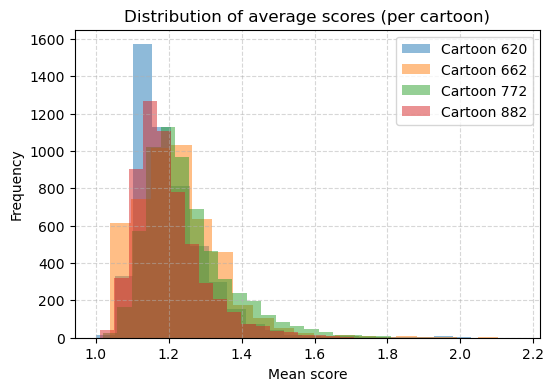

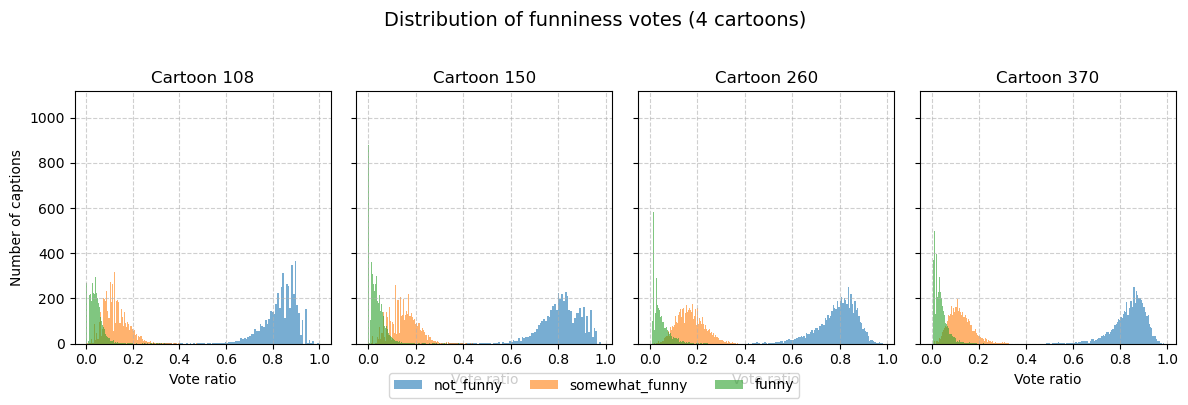

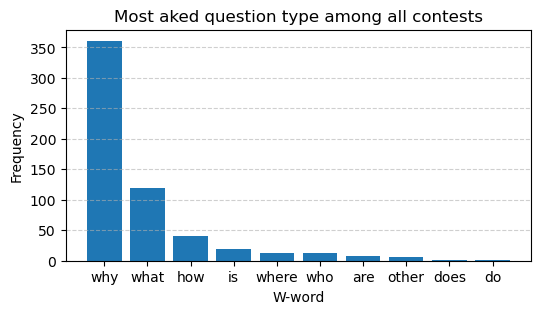

In [5]:
# histogram : avg score of all captions proposed + Kolmogorov–Smirnov test : normal distribution
histo = dst.plot_mean_histograms(dataA, boxplot=False)
# histogram : 'not_funny'/'somewhat_funny'/'funny' ratios among all captions, for the cartoon
dst.plot_funny_ratios(dataA)

### Plots/stats on all cartoons (dataC)
all_questions = [quest for sublist in dataC["questions"].dropna() for quest in sublist]
# 2.3.4: Top10 most used question's W-words
most_asked_question = dst.plot_question_types(all_questions)

### 1.6. Building usefull metrics

***To access to the definitions and content of classes SimilarityModel,***\
***CaptionClustering, SimilarHumorAnalysis, please see : [here](src\models\similarity_analysis.py)***

# 2. Narrative Flow

## 2.1. Axis 1 – What Is Considered Funny

### 2.1.1 : Katia's wonderful work

#### a. Data preparation

In [6]:
from tqdm import tqdm
from textblob import TextBlob
import re
from scipy.stats import anderson
from scipy.stats import ttest_ind



In [7]:
dataA = data['dataA']

dfs_with_id = [
    df.assign(source_id=i)   # add columns with ID of original dataset 
    for i, df in enumerate(dataA)
]
dataAm2 = pd.concat(dfs_with_id, ignore_index=True)
dataAm2.sort_values(by='funny_score_scaled', ascending=False, inplace=True)
dataAm2_2=dataAm2.drop_duplicates() # necessary because some captions were duplicated on some dataframes 
results_blob = []

dataAm2_2 = dataAm2_2.reset_index().rename(columns={"index": "caption_id"})
for i, cap in tqdm(zip(dataAm2_2['caption_id'], dataAm2_2['caption']), total=len(dataAm2_2)):
    blob = TextBlob(cap)
    results_blob.append({
        'caption_id': i,
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity,
        'num_words': len(blob.words),
        'num_punct': len(re.findall(r'[^\w\s]', cap)),
        'num_repeats': len(re.findall(r'\b(\w+)\s+\1\b', cap.lower()))
    })

df_blob = pd.DataFrame(results_blob)

dataAm_rf = dataAm2_2.merge(df_blob, on="caption_id", how="inner")
dataAm_rf= dataAm_rf[dataAm_rf["num_words"]<80] # remove captions that were badly encoded

100%|██████████| 2292354/2292354 [03:27<00:00, 11056.83it/s]


#### b. Comparison best and worth captions overall

Let's look at the ditribution of the funny score over the entire dataset.

AndersonResult(statistic=np.float64(50595.25888574589), critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(23.740472574965178), scale=np.float64(3.7631580153665776))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


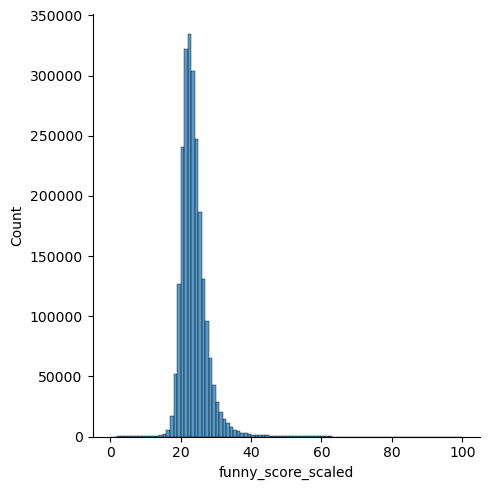

In [ ]:
sns.displot(dataAm_rf, x="funny_score_scaled", bins=100) 
result = anderson(dataAm_rf["funny_score_scaled"], dist='norm')
print(result)

We can see that distribution looks like normal but is actually not as anderson test is successfull, this is likely because we have a lot of data that can therefore grasp if the distribution deviate even a little bit from a normal pattern. Then to define our funny group we can retrieve by taking the higher and lower quantile which do not depend on the distribution.

In [8]:
low_threshold = dataAm_rf["funny_score_scaled"].quantile(0.0001)
high_threshold = dataAm_rf["funny_score_scaled"].quantile(0.9999)

print(f"Low threshold: {low_threshold}")
print(f"High threshold: {high_threshold}")
def assign_group(row, high_threshold, low_threshold):
    if row['funny_score_scaled'] >= high_threshold:
        return 'funny'
    elif row['funny_score_scaled'] <= low_threshold:
        return 'not_funny'
    else:
        return 'mid_funny'
dataAm_rf["funny_group3"] = dataAm_rf.apply(assign_group, axis=1, high_threshold=high_threshold, low_threshold=low_threshold)
dataAm_rf_filtered = dataAm_rf[dataAm_rf["funny_group3"] != 'mid_funny']
dataAm_rf.groupby('funny_group3')["source_id"].nunique()

Low threshold: 3.473942857142859
High threshold: 66.78341013824885


funny_group3
funny         84
mid_funny    384
not_funny      4
Name: source_id, dtype: int64

In [9]:
features = ['polarity', 'subjectivity', 'num_words', 'num_punct']
for f in features:
    g1 = dataAm_rf_filtered.loc[dataAm_rf_filtered['funny_group3'] == 'funny', f]
    g2 = dataAm_rf_filtered.loc[dataAm_rf_filtered['funny_group3'] == 'not_funny', f]

    t_stat, p_val = ttest_ind(g1, g2, equal_var=False)
    if p_val < 0.05:
        print(f"For {f} varibale : T-statistic: {t_stat}, P-value: {p_val} => Reject null hypothesis")
    else:   
        print(f"For {f} varibale : T-statistic: {t_stat}, P-value: {p_val}")

For polarity varibale : T-statistic: -0.9876455797312343, P-value: 0.32384722101489305
For subjectivity varibale : T-statistic: -2.203730584159546, P-value: 0.028046283668570884 => Reject null hypothesis
For num_words varibale : T-statistic: -0.6963916935356878, P-value: 0.48653653043938894
For num_punct varibale : T-statistic: -0.29385975381677965, P-value: 0.7689983847291602


#### c. Find very best and worst caption for website

In [13]:
best = dataAm_rf[dataAm_rf["funny_score_scaled"]==100]
worth = dataAm_rf[dataAm_rf["funny_score_scaled"]==0]

best_worth_df = pd.concat([best, worth], ignore_index=True)
display(best_worth_df)

best_contest = absolute_index2contest_index(best.iloc[0]["source_id"])
contest_worth = absolute_index2contest_index(worth.iloc[0]["source_id"])

path_worth = os.path.join( f"{root}/data/newyorker_caption_contest_virgin/images/", f"{contest_worth}.jpg")
path_best = os.path.join( f"{root}/data/newyorker_caption_contest_virgin/images/", f"{best_contest}.jpg")

#print(os.path.exists(path_best))

caption_id                                            caption      mean  \
0      862178                                    Lunch is on me.  2.518294   
1      418104  We're not getting Shakespeare, but about every...  1.000000   

   precision  votes  not_funny  somewhat_funny  funny  funny_score  \
0   0.004085  25200       2183            7784  15232        36.70   
1   0.000155   6467       6467               0      0       -17.55   

   funny_score_scaled funny_group  source_id  polarity  subjectivity  \
0               100.0       funny        153       0.0           0.0   
1                 0.0   not_funny         80       0.0           0.0   

   num_words  num_punct  num_repeats  
0          4          1            0  
1         15          3            0

In [10]:
ax_one.plot_boxplot_interactive(dataAm_rf_filtered, "funny_group3", features, title="funny_vs_not_funny")
ax_one.plot_boxplot_interactive(df_combined, "caption_type", features, title="funny_vs_not_funny")

NameError: name 'ax_one' is not defined

### 2.1.2. Dominic's extraordinary work

...

### 2.1.3 : Are there any topics to best create funniness and win the contest ?

Now that we have tried to analyse what elements makes a joke funnier, we will dive into caption-topics clustering, to try to see if there is some topics better than other, some that creates more fun.\
We will firstly build the pipeline analysing captions among one contest, and then generalize and perform statistical analysis to finally conclude about this question.

Contest number 801, published May 23, 2022 :
<center>
    <img src="data/newyorker_caption_contest_virgin/images/801.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>


*Top Rated caption* : “What do you mean I don’t have time for another game?”\
*The New Yorker's winner* : “I thought you’d be better at the endgame.”\
*Number of votes* : 562,261

We first tried to find clusters of topics using Kmeans, DBSCAN, agglomerative, and spectral clustering methods, varying the number of cluster (hyperparameter) (see the benchmark that was done [*here*](_Other/cycy_analysis/cycy_results_MS3.ipynb)). But the corresponding silouhette score calculated was really not satisfying. We then used the pretrained BERTtopic model [SOURCE] and here are the results.

In [6]:
import src.models.topic_clustering_analysis as topic_clustering

importlib.reload(topic_clustering)
from src.models.topic_clustering_analysis import CaptionTopicClusterer

CONTEST_IDX = 289

#### Identify common topics among all captions
HDBSCAN clustering algorithm and BERTtopic embedding



*PARAGRAPHE A REDIGER*

Finding the good minimum number of elements per topics:

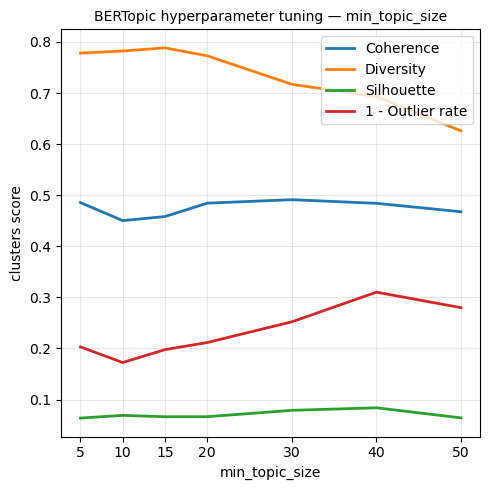

In [7]:
contest_idx = CONTEST_IDX
df_eval_test = pd.read_csv(os.path.join("_Other", "cycy_analysis", "saved_289", f"df_eval_test_contest_{contest_idx}.csv"))

x = df_eval_test["min_topic_size"]

plt.figure(figsize=(5,5))
plt.plot(x, df_eval_test["coherence"].values, linewidth=2, label="Coherence")
plt.plot(x, df_eval_test["diversity"].values, linewidth=2, label="Diversity")
plt.plot(x, df_eval_test["silhouette"].values, linewidth=2, label="Silhouette")
plt.plot(x, df_eval_test["outlier_rate"].values, linewidth=2, label="1 - Outlier rate")
plt.title("BERTopic hyperparameter tuning — min_topic_size", fontsize=10)
plt.xlabel("min_topic_size")
plt.ylabel("clusters score")
plt.xticks(x)
plt.grid(alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Le meilleur min_topic_size = celui juste avant : la chute de coherence, la hausse massive des outliers

Pour les captions humoristiques : embeddings très dispersés, beaucoup de quasi-singles --> silhouette naturellement faible\
 --> Donne plus de poids à la coherence + inspection humaine qu’au silhouette.


Once we found it, do the actual topic clustering

In [11]:
contest_idx = CONTEST_IDX
data_m = dataA[contest_idx].copy()
captions = data_m["caption"].tolist()

clusterer = CaptionTopicClusterer(fun_metric="funny_score_scaled", min_topic_size=30, verbose=False)  #can also use as fun_metric : funny_score_scaled

# Clusterize topics (do it only once, then save the results)
"""fit_topic = clusterer.fit_transform(captions)

with open(f"fit_topic_mints=30_contest_{contest_idx}.pkl", "wb") as f:
    pickle.dump(
        {
            "contest_idx": contest_idx,
            "min_topic_sizes": 30,
            "fit_topic": fit_topic
        }, f)

df_topic_info = fit_topic["df_topic_info"]
#df_topics.to_csv(os.path.join("_Other", "cycy_analysis", f"caption_labeled_topics_{contest_idx}.csv"), index=False)
df_topic_info.to_csv(os.path.join(f"info_topics_{contest_idx}.csv"), index=False)"""



with open(os.path.join("_Other", "cycy_analysis", "saved_289", f"fit_topic_mints=30_contest_{contest_idx}.pkl"), "rb") as f:
    data = pickle.load(f)

fit_res = data["fit_topic"]
data_m["topic_nb"] = fit_res["topics"]
df_topic_info = fit_res["df_topic_info"]

# Aggregate clusters into less topics
agg_info = clusterer.compute_aggregated_topic_info(df_topic_info, clusterer.agg_topic_289)      # agg_topic_289 TO CHANGE IF AN OTHER CONTEST !!!

# Calcule mean score of all captions by aggregated topic
df_scores = clusterer.compute_topic_scores(data_m, clusterer.agg_topic_289)                     # agg_topic_289 TO CHANGE IF AN OTHER CONTEST !!!

#### Assessing clustering quality:

In [12]:
# calculer la variance par topic
df_var = clusterer.compute_variance_stats(data_m)
#display(df_var)

kw_res= clusterer.kruskal_test(data_m)
print(f"Kruskal-Wallis test (H, p): {kw_res["H"]:0.2f}, pval = {kw_res["p"]:0.4f}")

pairwise_res = clusterer.pairwise_mannwhitney(data_m)
display(pairwise_res)

Kruskal-Wallis test (H, p): 50.71, pval = 0.0000


group1              group2         U         p_raw  \
19  bureaucracy_taxes_insurance         pop_culture   28878.5  2.845545e-07   
12  bureaucracy_taxes_insurance     chess_life_game   25531.0  3.350562e-07   
18  bureaucracy_taxes_insurance                misc   83330.5  1.004838e-05   
11  bureaucracy_taxes_insurance  checkmate_win_lose   81452.0  1.490837e-05   
65                  pop_culture  time_endgame_clock   26392.5  5.051445e-05   
..                          ...                 ...       ...           ...   
61          emotional_reactions         pop_culture    9393.0  3.176157e-02   
2                    body_parts     chess_life_game   26228.0  2.307334e-01   
1                    body_parts  checkmate_win_lose   81140.5  6.399926e-01   
63                         misc         pop_culture  216681.5  3.054015e-02   
62          emotional_reactions  time_endgame_clock    3936.0  9.598875e-01   

    p_adj_bonf  
19    0.000019  
12    0.000022  
18    0.000663  
11    0.000984  
65    0.003334  
..         ...  
61    1.000000  
2     1.000000  
1     1.000000  
63    1.000000  
62    1.000000  

[66 rows x 5 columns]

TO ANALYSE

#### Comparing funny score of all topics

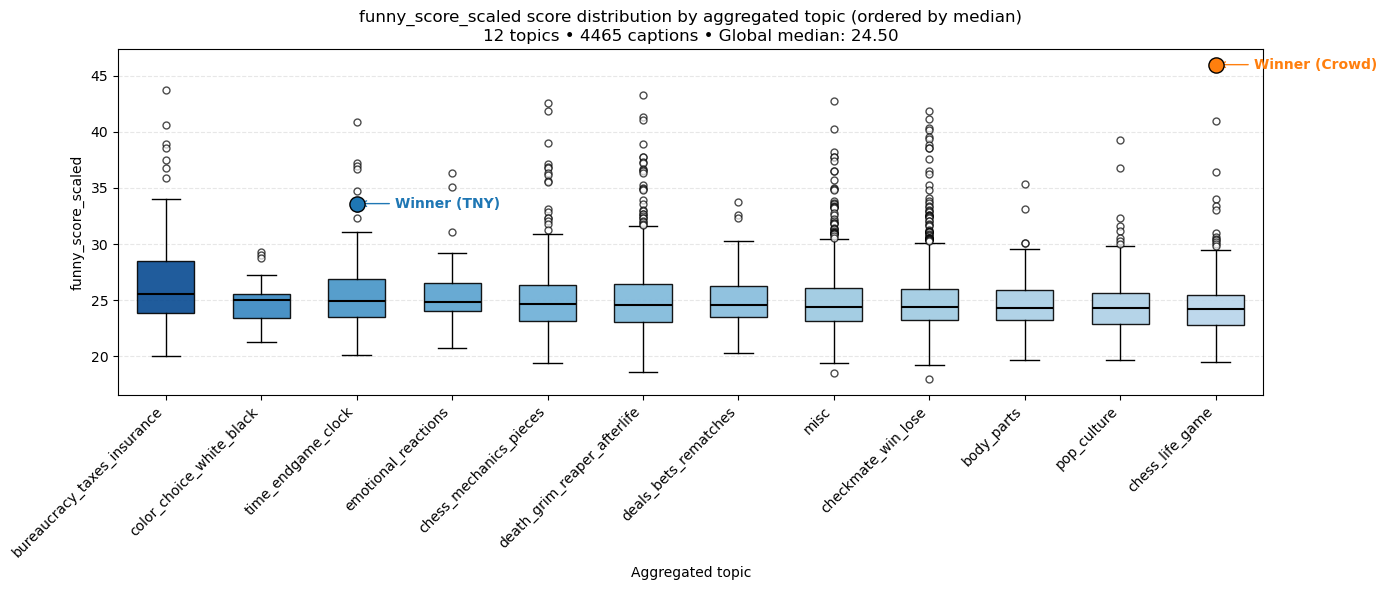

Caption TNY trouvée : True
Caption Crowd trouvée : True


In [ ]:
caption_crowd="""I guess "trail lawyer" wasn't a typo after all."""
caption_tny="I guess I misunderstood when you said your legal problems were behind you."
topic_crowd = data_m.loc[data_m["caption"] == caption_crowd, "aggregated_topic"].iloc[0]
topic_tny = data_m.loc[data_m["caption"] == caption_tny, "aggregated_topic"].iloc[0]

# Boxplot (funny score distribution within each topic)
#clusterer.plot_topic_scores2(data_m, df_scores, save=os.path.join("_Other", "cycy_analysis", "saved_plots", f"boxplot_topics_{contest_idx}.html"))
#clusterer.plot_topic_scores2_with_winners(data_m, df_scores, caption_crowd=caption_crowd, caption_tny=caption_tny, save=os.path.join("_Other", "cycy_analysis", "saved_plots", f"boxplot_topics_with_winners_{contest_idx}.html"))
clusterer.plot_topic_scores2_with_winners_plt(data_m, df_scores, caption_crowd=caption_crowd, caption_tny=caption_tny)

#### Long-tail distribution bias:
Those boxplots per topic allow us to see the distributions of caption scores within each topic.

But if each cluster contains many mediocre captions and a few exellent ones, the average will flatten everything, resulting in a very low average score per topic. Therefore, we need to look beyond the average. We can :

1) We isolates the top X% and the average range (40–60) and compare whether certain topics are over-represented in the top rankings versus the average. To do this, we calculate the 'enrichment per topic' (=top proportion vs. overall proportion). This allows us to answer the question "Which topics produce the most excellent captions?" without using the average.

2) Instead of looking at "which topic is the funniest on average", we look at: "which topics produce the most excellent captions?" by calculating the success rate (defined a score above the average score : 1.5/3 for the mean score, 50/100 for the funny_score_scaled) rather than the average score.

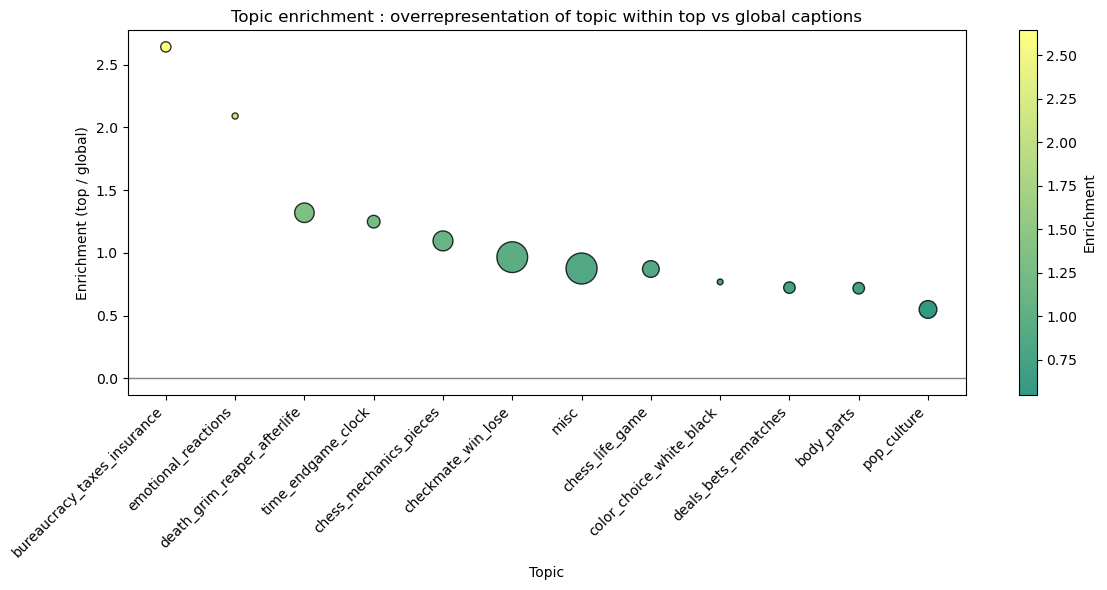

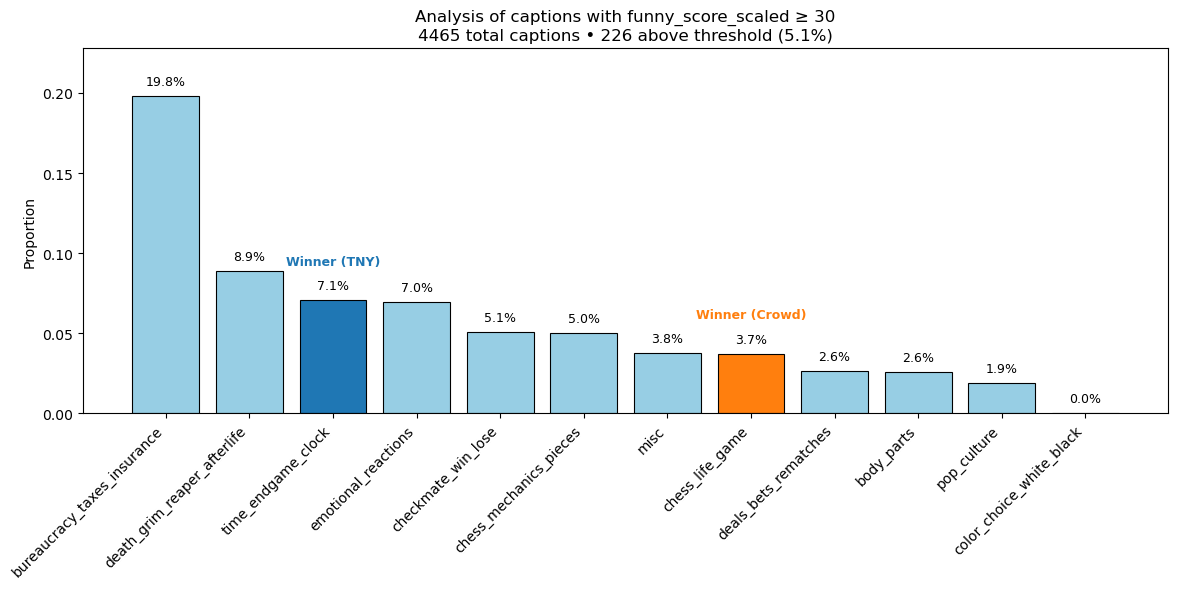

In [ ]:
### 1. Calcule un score d’enrichissement pour voir quels topics sont sur-représentés dans le top
df_top, df_mid, enrichment = clusterer.stratify_percentiles_and_compare(data_m, top_pct=10, middle_pct=(40,60))
#clusterer.plot_bubble_enrichment(enrichment, save=os.path.join("_Other", "cycy_analysis", "saved_plots", f"enrichment_{contest_idx}.html"))
clusterer.plot_bubble_enrichment_plt(enrichment)



### 2. Barplot with the proportion of captions above a certain score (the average score) for all topics
#clusterer.plot_proportion_above_threshold(data_m, threshold=30, save=os.path.join("_Other", "cycy_analysis", "saved_plots", f"prop_above_thresh_{contest_idx}.html"))

# Colorer le graph ci-dessus en fonction de quel topic contient les captions gagnante selon TNY ou selon le rank du crowd sourcing
#clusterer.plot_proportion_above_threshold_with_winners(data_m, topic_crowd, topic_tny, threshold=30, save=os.path.join("_Other", "cycy_analysis", "saved_plots", f"prop_above_thresh_with_winners_{contest_idx}.html"))
clusterer.plot_proportion_above_threshold_with_winners_plt(data_m, topic_crowd, topic_tny, threshold=30)

--> Est-ce que le topic gagnant est aussi celui qui surperforme globalement ?

## 2.2. Axis 2 - How professions are laughed about

The methodology for this part of the data story starts by loading and preparing the data again. The official dataset is loaded in the same way as in the previous sections. Captions are lightly cleaned using simplified preprocessing. Contractions are expanded, punctuation is removed, and stopwords as well as single character words are removed. Lemmatisation is not applied, as it can negatively affect occupation terms. Typo correction is also not applied, as it is too time consuming.

After preprocessing, a TF IDF matrix is created. This matrix is not used extensively for modelling, but it is used to identify where occupation terms occur in the captions and how often they appear.

Once these components are ready, the ``OccupationAnalysis`` object is created. This object encapsulates all methods used for the occupation based analysis. Its initial construction is time consuming (takes at least 10 hours!) because it builds two core dataframes that store occupation level and category level information. These dataframes are required for all subsequent analyses. Once they have been created and saved, the object can be reinitialised much faster by providing the file paths to these precomputed dataframes.


In [ ]:
#loading packages specific to this analysis.
import importlib
import src.data.tokenise as tokenise
importlib.reload(tokenise)
from src.utils.tf_idf_matrix import extract_documents
from src.data.tokenise import load_data, preprocess_text_list, apply_preprocessing, save_data
from src.models.occupation_analysis import OccupationAnalysis
from src.utils.occupation_analysis import load_occupation_mapping
import time

#loading occupation list
occupation_list = pd.read_csv(OCCUPATIONS_CSV_PATH)["Synonyms"].tolist()

#flatten
flat_occupation_list = [syn.lower() for sublist in occupation_list for syn in ast.literal_eval(sublist)]
print(f"Total occupation synonyms: {len(flat_occupation_list)}")
occupation_list = flat_occupation_list

# loading lightly cleaned data.
data_A_occ, data_C_occ, dataA_startID, dataA_endID, dataC_lastGoodID = load_data(STORED_DATAPREPNOUNS_PKL_PATH)

# Loading TF-IDF matrix and metadata
tfidf_matrix = load_npz(TFIDF_MATRIX_NPZ_PATH)
metadata = np.load(TF_IDF_MATRIX_METADATA_NPZ_PATH)
occupation_indices = metadata["occupation_indices"]
occupation_counts = metadata["occupation_counts"]

# Loading the TF-IDF vectoriser to get feature names
vectoriser = joblib.load(TFIDF_MATRIX_JOBLIB_PATH)
feature_names = vectoriser.get_feature_names_out()

#initialize OccupationAnalysis object
documents, scores, contest_id = extract_documents(data_A_occ, 'cleaned_caption', 'funny_score_scaled')

time_start = time.time()
print("Initializing OccupationAnalysis...")
occupation_analysis = OccupationAnalysis(
    tf_idf_matrix=tfidf_matrix,
    feature_names=feature_names,
    term_indices=occupation_indices,
    term_counts=occupation_counts,
    scores=scores,
    occupations_mapping= load_occupation_mapping(OCCUPATIONS_CSV_PATH),
    documents=documents,
    contest_ids=contest_id,
    occupation_df_path=OCCUPATIONS_ANALYSIS_PKL_PATH,
    category_caption_df_path=OCCUPATIONS_CATEGORY_ANALYSIS_PKL_PATH,
    force_rebuild=False
)
print(f"OccupationAnalysis initialization time: {time.time() - time_start:0.2f} seconds")

In [ ]:
#The code here is commented out to avoid re-running the TF-IDF matrix creation every time.

'''
# Creation of TF-IDF matrix, extracting index of occupations and their counts
#create feature vector
data_A, data_C, dataA_startID, dataA_endID, dataC_lastGoodID = load_data(STORED_DATAPREP_PKL_PATH) # loads the general data
print(f"Starting simplified preprocessing...")
data_A_occ, data_C_occ = apply_preprocessing(data_A, data_C, min_len=1)
print("Saving simplified preprocessed data...")
save_data(data_A_occ, data_C_occ, dataA_startID, dataA_endID, dataC_lastGoodID, STORED_DATAPREPNOUNS_PKL_PATH)

#load preprocessed data with only nouns
data_A_occ, data_C_occ, dataA_startID, dataA_endID, dataC_lastGoodID = load_data(STORED_DATAPREPNOUNS_PKL_PATH)

#creating the tf-idf matrix
documents, scores, _ = extract_documents(data_A_occ, 'cleaned_caption' , "funny_score_scaled") # extracts the cleaned captions from all dataframes in data_A_occ
tf_idf_matrix, vectoriser = create_tf_idf_matrix(documents, print_time = True)
feature_names = vectoriser.get_feature_names_out()
scores = np.array(scores)

#extract occupation term indices and counts (takes around 6 hours, depending on the number of occupation terms)
occupation_counts, occupation_indices = extract_terms_counts(tf_idf_matrix, feature_names, occupation_list)

#save tf-idf matrix, vectoriser, feature names, scores, occupation indices and counts
save_npz(TFIDF_MATRIX_NPZ_PATH, tf_idf_matrix)

np.savez(TF_IDF_MATRIX_METADATA_NPZ_PATH,occupation_indices=occupation_indices, occupation_counts=occupation_counts)
joblib.dump(vectoriser, TFIDF_MATRIX_JOBLIB_PATH)'''

Once this is complete, we have an object that handles all analyses and plots, so only short snippets need to be run. Even the BERTopic analysis should take only a few minutes, because the number of distinct occupation occurrences has been reduced. The long runtime above is mainly due to the very large occupation list I constructed, which contains substantial repetition and includes roles that could be removed. This is a clear area for improving the model.

We can now give a strong overview of how occupations are represented and perceived in the dataset. For exploratory analysis, I propose the following seven plots.

1. Plot the top 20 occupations by the number of captions in which they appear.

2. For the most frequent occupations, plot the number of contests in which they appear to assess whether they are widespread or concentrated in a small subset.

3. Plot the distribution of funniness scores for selected occupations (doctor, lawyer, president, clown, CEO, cop) to check normality and whether the mean or median is the more suitable summary.

4. Plot the occupations with the highest average funniness scores, restricting to occupations above a chosen minimum frequency threshold.

5. Plot the occupations with the lowest average funniness scores, again applying a minimum frequency threshold for robustness.

6. Plot funniness by occupation using either mean with standard deviation or box plots to show both central tendency and variability.

Furthermore, we can conduct statistical tests on the identified jobs above, to see if any of those perform better than others. These will provide some fun introductory stats that we can use in the datastory. Finally, use the designed method to compare the average funniness of cpations with or without an occupation. This method also takes around 40 minutes to run (looping through 60k occupations and the 2million captions).

In [ ]:
preliminary_occupation_df = occupation_analysis.exploratory_occupation_analysis()  # calculate around 40 minutes here...
display(preliminary_occupation_df)

In [ ]:
#get occupation_df
occupation_df = occupation_analysis.get_occupation_dataframe()

#get category_caption_df
category_caption_df = occupation_analysis.get_category_caption_dataframe()

In [ ]:
#plot of highest count occupations
filename = None  # or provide a path to save the plot
occupation_analysis.plot_top_occupations_by_count(start = 0, end = 20, save = filename)

In [ ]:
#plotting a dropdown to explore all possuble occupations and number of occurence
filename = None  # or provide a path to save the plot
occupation_analysis.plot_occupation_dropdown(page_size = 20, save = filename)  #or provide a path to save the plot

In [ ]:
# top occupations and number of contests they appear in
occupation_analysis_df = occupation_df.sort_values(by = 'term_count', ascending = False)
fig = px.bar(occupation_analysis_df.head(20), x='occupation', y='num_contests')
fig.update_layout(title='Top 20 Occupations by Number of Contests Appeared In',
                    xaxis_title='Occupation',
                    yaxis_title='Number of Contests',
                    xaxis_tickangle=-45)

fig.update_traces(hovertemplate="Term: %{x}<br>Num contests: %{y}<extra></extra>")

# save to HTML
#fig.write_html("term_num_contests_bar.html", include_plotlyjs="cdn")
fig.show()


In [ ]:
#distribution of funny scores for captions containing a specific occupation
main_occupations = ['doctor', 'lawyer', 'president', 'nurse', 'cop', 'clown', 'ceo']
filenames = None  # or provide a path to save the plot
nbins = 50 # reduce numbers if too many bars
for filename, occupation in zip(filenames or [None]*len(main_occupations), main_occupations):
    occupation_analysis.plot_occupation_distribution(occupation, save=filename, nbins=nbins)

In [ ]:
#plot of occupations with highest average funny scores
filename = None  # or provide a path to save the plot
occupation_analysis.plot_top_occupations_by_funniness(top_n = 20, save_path = filename, measure='avg')

#but does this provide a good measure of funniness? or are distributions skewed?
filename = None  # or provide a path to save the plot
occupation_analysis.plot_top_occupations_by_funniness(top_n = 20, save_path = filename, measure='median')

In [ ]:
#plotting the lowest average funny scores/median funny scores
filename = None  # or provide a path to save the plot
occupation_analysis.plot_top_occupations_by_funniness(top_n = 20, save_path = filename, measure='avg', ascending=True)

filename = None  # or provide a path to save the plot
occupation_analysis.plot_top_occupations_by_funniness(top_n = 20, save_path = filename, measure='median', ascending=True)

In [ ]:
#plotting box plots of multiple occupations
filename = None  # or provide a path to save the plot
main_occupations = ['doctor', 'lawyer', 'president', 'nurse', 'cop', 'clown', 'ceo']
occupation_analysis.plot_occupation_box_plot(main_occupations, save=filename)


With the pots done, we can move onto the statistical testing part

In [ ]:
#comparing a set of occupations' scores
main_occupations = ['doctor', 'lawyer', 'president', 'nurse', 'cop', 'clown', 'ceo']
alpha = 0.05
stat, p_values = occupation_analysis.compare_set_of_occupations(main_occupations, interpret=True, alpha = alpha)

#compare each occupation to 'compare_to' occupation
compare_to = 'doctor'
alternative = 'two-sided'  # 'greater', 'less', 'two-sided'
alpha = 0.05
for occ in main_occupations:
    if occ != compare_to:
        print("-----------------------------")
        print(f"Comparing occupation: {occ} to {compare_to}")
        stat, p_value = occupation_analysis.compare_occupations(occ, compare_to, interpret=True, alpha=alpha, alternative=alternative)
        delta = occupation_analysis.cliffs_delta_occupations(occ, compare_to, interpret=True, alpha=alpha)

## 2.3. Axis 3 - Gender Roles and stereotypes


### Amélie's stunning work

...

In [5]:
from IPython.core.display import HTML

# Read the HTML content
with open(r"_Other\amelie_analysis\saved plots\topic_female.html", "r") as f:
    html_content = f.read()

# Display it
HTML(html_content)

# A big (thank you)² for this lecture !

# What is the answer to ADA, the universe and everything ?

In [9]:
import random

answer = None
number_of_tries = 0
while answer != 42:
    # Generate one random number
    answer = random.randint(0, 1_000_000)
    number_of_tries += 1

print("Number of TEEEEEENTATIVES:", number_of_tries, end="\r")
print("\nThe answer to ADA, the universe and everything is:", answer)


Number of TEEEEEENTATIVES: 421531
The answer to ADA, the universe and everything is: 42


# <center>Humor as a Mirror: The New Yorker Captions as Reflections of Society, Politics, and Stereotypes</center>
# <center>THE END</center>

<br/><br/>
<center>
    <img src="data/newyorker_caption_contest_virgin/images/606.jpg" alt="New Yorker Cartoon" style="width:300px; height:auto; border-radius:5px; box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
</center>